# Major Malfunction
**Challenge Description**

Our team noticed that some adversaries have been trading music recommendations once a week at the exact same time for the last several months. While the recommendations do sound like music, one of our guys thought something seemed off about all of them and it was worth further investigation. Attached is a .mid version of the song, where another one of our analysts have removed anything that could be ruled out as not being part of a message. Can you figure out what the secret message is?

## Acknowledgements
In the making of this writeup, we made use of information disclosed by the challenge author in Discord after the CTF event concluded.

## Initial Investigation
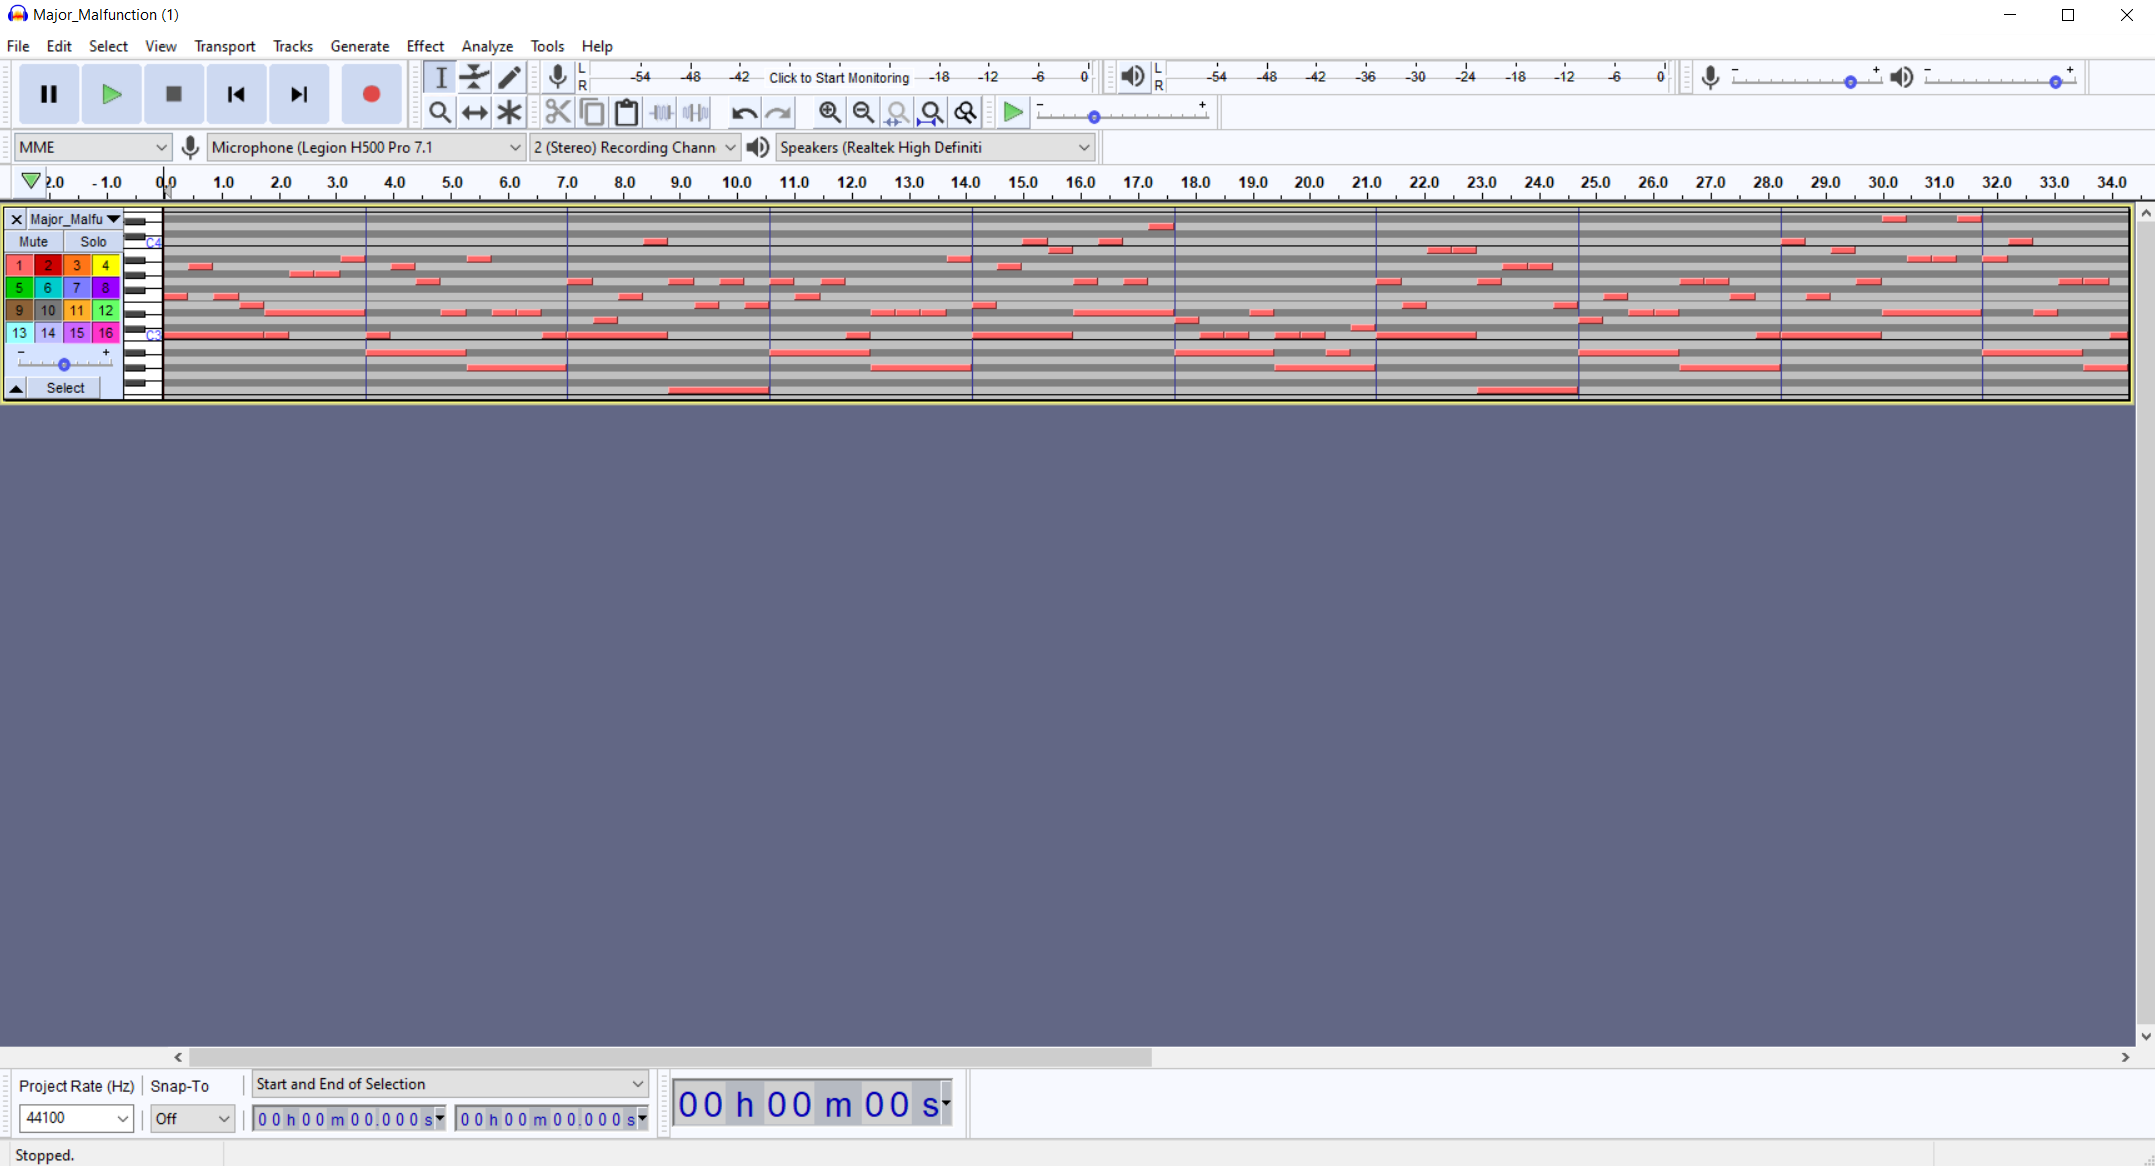
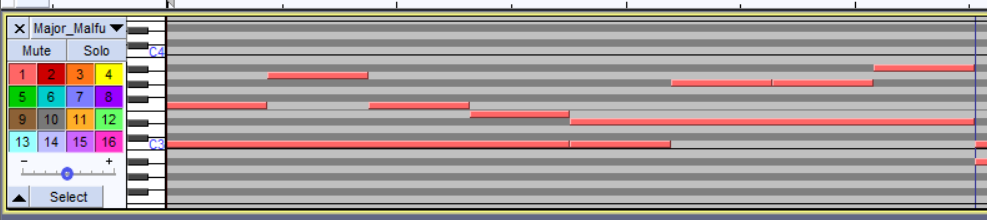
First we open the mid file in Audacity to check out what we are working with. We can see that there is one instrument track with two notes playing at any given time. There is one long note for 4 beats and shorter notes every beat. We listen to the track to see if we can hear any clues on how this might be decoded, but the music doesn't make much sense.

Next we open the file using the pretty_midi python library in a jupyter notebook to take a look at the note data

In [1]:
import pretty_midi
import numpy as np
pm = pretty_midi.PrettyMIDI('Major_Malfunction.mid') # Warning here not important

/home/benderly/.local/lib/python3.8/site-packages/pretty_midi/pretty_midi.py:97: RuntimeWarning: Tempo, Key or Time signature change events found on non-zero tracks.  This is not a valid type 0 or type 1 MIDI file.  Tempo, Key or Time Signature may be wrong.
  warnings.warn(


In [2]:
# Lets take a look at the note data
pm.instruments[0].notes

[Note(start=0.000000, end=0.250000, pitch=53, velocity=100),
 Note(start=0.250000, end=0.500000, pitch=57, velocity=100),
 Note(start=0.500000, end=0.750000, pitch=53, velocity=100),
 Note(start=0.750000, end=1.000000, pitch=52, velocity=100),
 Note(start=0.000000, end=1.000000, pitch=48, velocity=100),
 Note(start=1.000000, end=1.250000, pitch=48, velocity=100),
 Note(start=1.250000, end=1.500000, pitch=56, velocity=100),
 Note(start=1.500000, end=1.750000, pitch=56, velocity=100),
 Note(start=1.000000, end=2.000000, pitch=51, velocity=100),
 Note(start=1.750000, end=2.000000, pitch=58, velocity=100),
 Note(start=2.000000, end=2.250000, pitch=48, velocity=100),
 Note(start=2.250000, end=2.500000, pitch=57, velocity=100),
 Note(start=2.500000, end=2.750000, pitch=55, velocity=100),
 Note(start=2.000000, end=3.000000, pitch=46, velocity=100),
 Note(start=2.750000, end=3.000000, pitch=51, velocity=100),
 Note(start=3.000000, end=3.250000, pitch=58, velocity=100),
 Note(start=3.250000, en

## Solution
It is likely that each note combination (long + short) is meant to be evaluated together, so we think about possible relationships between the notes.

In the challenge name ("Major Malfunction") the challenge author provides a hint that this may have to do with the musical term "Major" - ie. Major chords, Major scales, etc

In [3]:
# Split the notes array into long and short
long_notes = [i for i in pm.instruments[0].notes if i.end-i.start == 1]
short_notes = [i for i in pm.instruments[0].notes if i.end-i.start == 0.25]

In [4]:
# For each note paring, determine the pitch difference between them
intervals = []
for i, short, in enumerate(short_notes):
    long = long_notes[i//4]    # each long note is there for 4 short notes
    intervals.append(short.pitch - long.pitch)

In [5]:
intervals

[5,
 9,
 5,
 4,
 -3,
 5,
 5,
 7,
 2,
 11,
 9,
 5,
 14,
 7,
 7,
 4,
 7,
 2,
 5,
 12,
 14,
 11,
 14,
 11,
 9,
 7,
 9,
 2,
 7,
 7,
 7,
 14,
 4,
 9,
 12,
 11,
 4,
 9,
 4,
 11,
 4,
 2,
 2,
 5,
 4,
 4,
 2,
 5,
 7,
 4,
 11,
 11,
 14,
 16,
 16,
 11,
 4,
 7,
 5,
 5,
 11,
 11,
 9,
 4,
 12,
 5,
 11,
 7,
 12,
 7,
 7,
 12,
 12,
 14,
 5,
 9,
 11,
 4,
 4,
 12,
 7,
 11,
 9,
 12,
 11,
 14,
 12,
 19,
 7,
 12,
 5,
 12,
 14,
 17,
 11,
 9,
 11,
 2,
 7,
 9,
 4,
 12,
 11,
 4,
 11,
 9,
 12,
 12,
 7,
 9,
 9,
 7,
 5,
 4,
 2,
 9,
 12,
 12,
 9,
 14,
 11,
 11,
 4,
 2,
 12,
 17,
 12,
 11,
 11,
 7,
 12]

Here we can notice that all the intervals are the intervals of a Major scale, which go 0, 2, 4, 5, 7, 9, 11. More information on Major scales can be found at https://en.wikipedia.org/wiki/Major_scale

Some of the intervals are outside of the range due to being more than one scale away, so we can use modulus 12 to bring all notes into the original range

In [6]:
intervals = [i % 12 for i in intervals]                 # bring all notes into a single scale range
inverval_to_note = {0:0, 2:1, 4:2, 5:3, 7:4, 9:5, 11:6} # define interval to note of the scale mapping 
                                                        # ex. 4th interval is 2nd note in major scale

In [7]:
# Convert each interval into its note in the scale
notes = [inverval_to_note[i] for i in intervals]
notes

[3,
 5,
 3,
 2,
 5,
 3,
 3,
 4,
 1,
 6,
 5,
 3,
 1,
 4,
 4,
 2,
 4,
 1,
 3,
 0,
 1,
 6,
 1,
 6,
 5,
 4,
 5,
 1,
 4,
 4,
 4,
 1,
 2,
 5,
 0,
 6,
 2,
 5,
 2,
 6,
 2,
 1,
 1,
 3,
 2,
 2,
 1,
 3,
 4,
 2,
 6,
 6,
 1,
 2,
 2,
 6,
 2,
 4,
 3,
 3,
 6,
 6,
 5,
 2,
 0,
 3,
 6,
 4,
 0,
 4,
 4,
 0,
 0,
 1,
 3,
 5,
 6,
 2,
 2,
 0,
 4,
 6,
 5,
 0,
 6,
 1,
 0,
 4,
 4,
 0,
 3,
 0,
 1,
 3,
 6,
 5,
 6,
 1,
 4,
 5,
 2,
 0,
 6,
 2,
 6,
 5,
 0,
 0,
 4,
 5,
 5,
 4,
 3,
 2,
 1,
 5,
 0,
 0,
 5,
 1,
 6,
 6,
 2,
 1,
 0,
 3,
 0,
 6,
 6,
 4,
 0]

Now that we have all of the note values, we can consider how to interpret this into ascii text to obtain the flag. Notice that all the values are from 0-6 which is base 7, so we can try to convert from base 7 into ascii.

In [8]:
note_str = ''.join(str(i) for i in notes)   # Combine into one string
val = int(note_str, 7)                      # Interpret base7 string as an integer
from Crypto.Util.number import long_to_bytes
long_to_bytes(val)                          # Convert from int to ascii

b'uscg{b9e87122589167966989853582e619906bb24648}'